# trendet - is a Python package for trend detection on stock time series data

**por Álvaro Bartolomé del Canto @ alvarob96 en GitHub**

---

## Introducción

**trendet** es un paquete de Python para la identificación de tendencias alcistas y/o bajistas de las acciones en base a sus datos históricos de cierre. **trendet** es una herramienta que se basa en los datos extraidos por **investpy** de las acciones, siendo este otro paquete de Python que extrae datos de Investing.com.

De todas formas, **trendet** puede ser utilizado para identificar tendencias en cualquier `pandas.DataFrame` se una serie temporal que contenga al menos una columna con valores numéricos; aunque su uso esté orientado a la identificación de tendencias en datos históricos de acciones.

---
## Instalación

Para instalar **trendet** se requiere una versión de Python 3.x y tener **pip** instalado, para así poder instalar paquetes de Python de [PyPI](https://pypi.org/). De este modo, **trendet** se instalará desde la terminal de la forma:

`$ python -m pip install trendet==0.5`

O, en caso de disponer de una versión de __trendet__ instalada, para actualizar dicha versión a la última disponible, ejecutar la siguiente orden en terminal:

`$ python -m pip install trendet --upgrade`

---
## Uso

Dado que **trendet** está integrado con **investpy**, las principales funcionalidades del paquete están orientadas a los datos extraídos de **investpy**, en este caso los `pandas.DataFrame` que contienen los datos de apertura, máximo, mínimo y cierre de una acción. Es decir, **trendet** está orientado a su uso con conjuntos de datos relacionados con los datos históricos de distintos productos financieros sobre series temporales para identificar las tendencias que han tenido lugar a lo largo del tiempo.

In [1]:
import trendet

In [2]:
(trendet.__author__, trendet.__version__)

('Alvaro Bartolome @ alvarob96 on GitHub', '0.5')

De este modo se procederá al desglose y uso de las principales funciones de **trendet**:

### trendet.identify_trends()

En el ejemplo presentado a continuación, la función `identify_trends` se utilizará para detectar 3 tendencias alcistas y bajistas, donde cada una de dichas tendencias se considerará tal, si abarca una ventana superior a 5 días. De este modo, las tendencias identificadas, en caso de haberlo sido, se identificarán de manera única con cada una de las etiquetas introducidas.

In [23]:
df = trendet.identify_trends(equity='bbva',
                             country='spain',
                             from_date='01/01/2018',
                             to_date='01/01/2019',
                             window_size=5,
                             trend_limit=3,
                             labels=['A', 'B', 'C'])

In [24]:
df.head()

,Open,High,Low,Close,Volume,Currency,Up Trend,Down Trend
Date,,,,,,,,
2018-01-02,7.139,7.169,7.050,7.082,15960000,EUR,A,NaN
2018-01-03,7.113,7.120,7.055,7.094,13320000,EUR,A,NaN
2018-01-04,7.113,7.274,7.104,7.221,20790000,EUR,A,NaN
2018-01-05,7.259,7.282,7.203,7.253,13580000,EUR,A,NaN
2018-01-08,7.274,7.293,7.220,7.235,13420000,EUR,A,NaN


### trendet.identify_all_trends()

**trendet** a través de la función `identify_all_trends` permite la identificación de todas las tendencias encontradas en los datos históricos de cierre recuperado por **investpy**. La diferencia entre esta función y `identify_trends` es que esta función permite recuperar todas las tendencias encontradas sin ninguna restricción.

In [43]:
df = trendet.identify_all_trends(equity='orange',
                                 country='france',
                                 from_date='01/01/2018',
                                 to_date='01/01/2019',
                                 window_size=5)

In [44]:
df.head()

,Open,High,Low,Close,Volume,Currency,Up Trend,Down Trend
Date,,,,,,,,
2018-01-02,14.52,14.53,14.39,14.52,5620000,EUR,NaN,NaN
2018-01-03,14.53,14.54,14.37,14.49,5710000,EUR,NaN,NaN
2018-01-04,14.53,14.54,14.42,14.49,7180000,EUR,NaN,NaN
2018-01-05,14.52,14.62,14.47,14.62,5740000,EUR,NaN,NaN
2018-01-08,14.62,14.72,14.59,14.70,4570000,EUR,NaN,NaN


### trendet.identify_df_trends()

Adicionalmente, como mencionado previamente, **trendet** puede ser utilizado con cualquier `pandas.DataFrame` con la función `identify_df_trends` aunque su uso está orientado a ser combinado con **investpy**. De este modo, el único requisito del dataset de entrada es que contenga una columna con datos en formato `int64` o `float64`, es decir, de tipo numérico para poder calcular las tendencias correctamente. Por tanto, dado un `pandas.DataFrame` de entrada, se identificarán las tendencias del mismo aunque sus valores no se correspondan con valores de mercado.

In [27]:
import investpy

In [28]:
(investpy.__author__, investpy.__version__)

('Alvaro Bartolome <alvarob96@usal.es>', '0.9.2')

In [38]:
df = investpy.get_historical_data(equity='coca-cola',
                                  country='united states',
                                  from_date='01/01/2018',
                                  to_date='01/01/2019')

In [39]:
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-01-02,45.91,45.94,45.51,45.54,10870000,USD
2018-01-03,45.49,45.69,45.34,45.44,12640000,USD
2018-01-04,45.56,46.22,45.45,46.08,12710000,USD
2018-01-05,46.02,46.20,45.79,46.07,13110000,USD
2018-01-08,45.95,46.10,45.88,46.00,7070000,USD


In [40]:
df = trendet.identify_df_trends(df=df, column='Close')

In [41]:
df.head()

,Open,High,Low,Close,Volume,Currency,Up Trend,Down Trend
Date,,,,,,,,
2018-01-02,45.91,45.94,45.51,45.54,10870000,USD,NaN,NaN
2018-01-03,45.49,45.69,45.34,45.44,12640000,USD,NaN,NaN
2018-01-04,45.56,46.22,45.45,46.08,12710000,USD,NaN,NaN
2018-01-05,46.02,46.20,45.79,46.07,13110000,USD,NaN,NaN
2018-01-08,45.95,46.10,45.88,46.00,7070000,USD,NaN,NaN


----

Adicionalmente, se procederá a la visualización de los resultados obtenidos por **trendet** con el fin de reflejar sobre una gráfica las tendencias identificadas en la serie temporal introducida. De este modo, se hará uso del estilo para [matplotlib](https://matplotlib.org/) creado por [@Dih5](https://github.com/Dih5) en GitHub, estilo orientado a las publicaciones científicas, [paper-themes](https://github.com/Dih5/paper-themes).

A través de este estilo, junto con el uso de funcionalidades de **matplotlib** y **seaborn** para la visualización de los datos, se procederá a la creación de las gráficas del `pandas.DataFrame` resultante de **trendet** donde las tendencias alcistas se representan en color verde y las bajistas en color rojo.

In [7]:
import trendet

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid')

In [12]:
df = trendet.identify_all_trends(equity='bbva',
                                 country='spain',
                                 from_date='01/01/2018',
                                 to_date='01/01/2019',
                                 window_size=5)

In [13]:
df.reset_index(inplace=True)

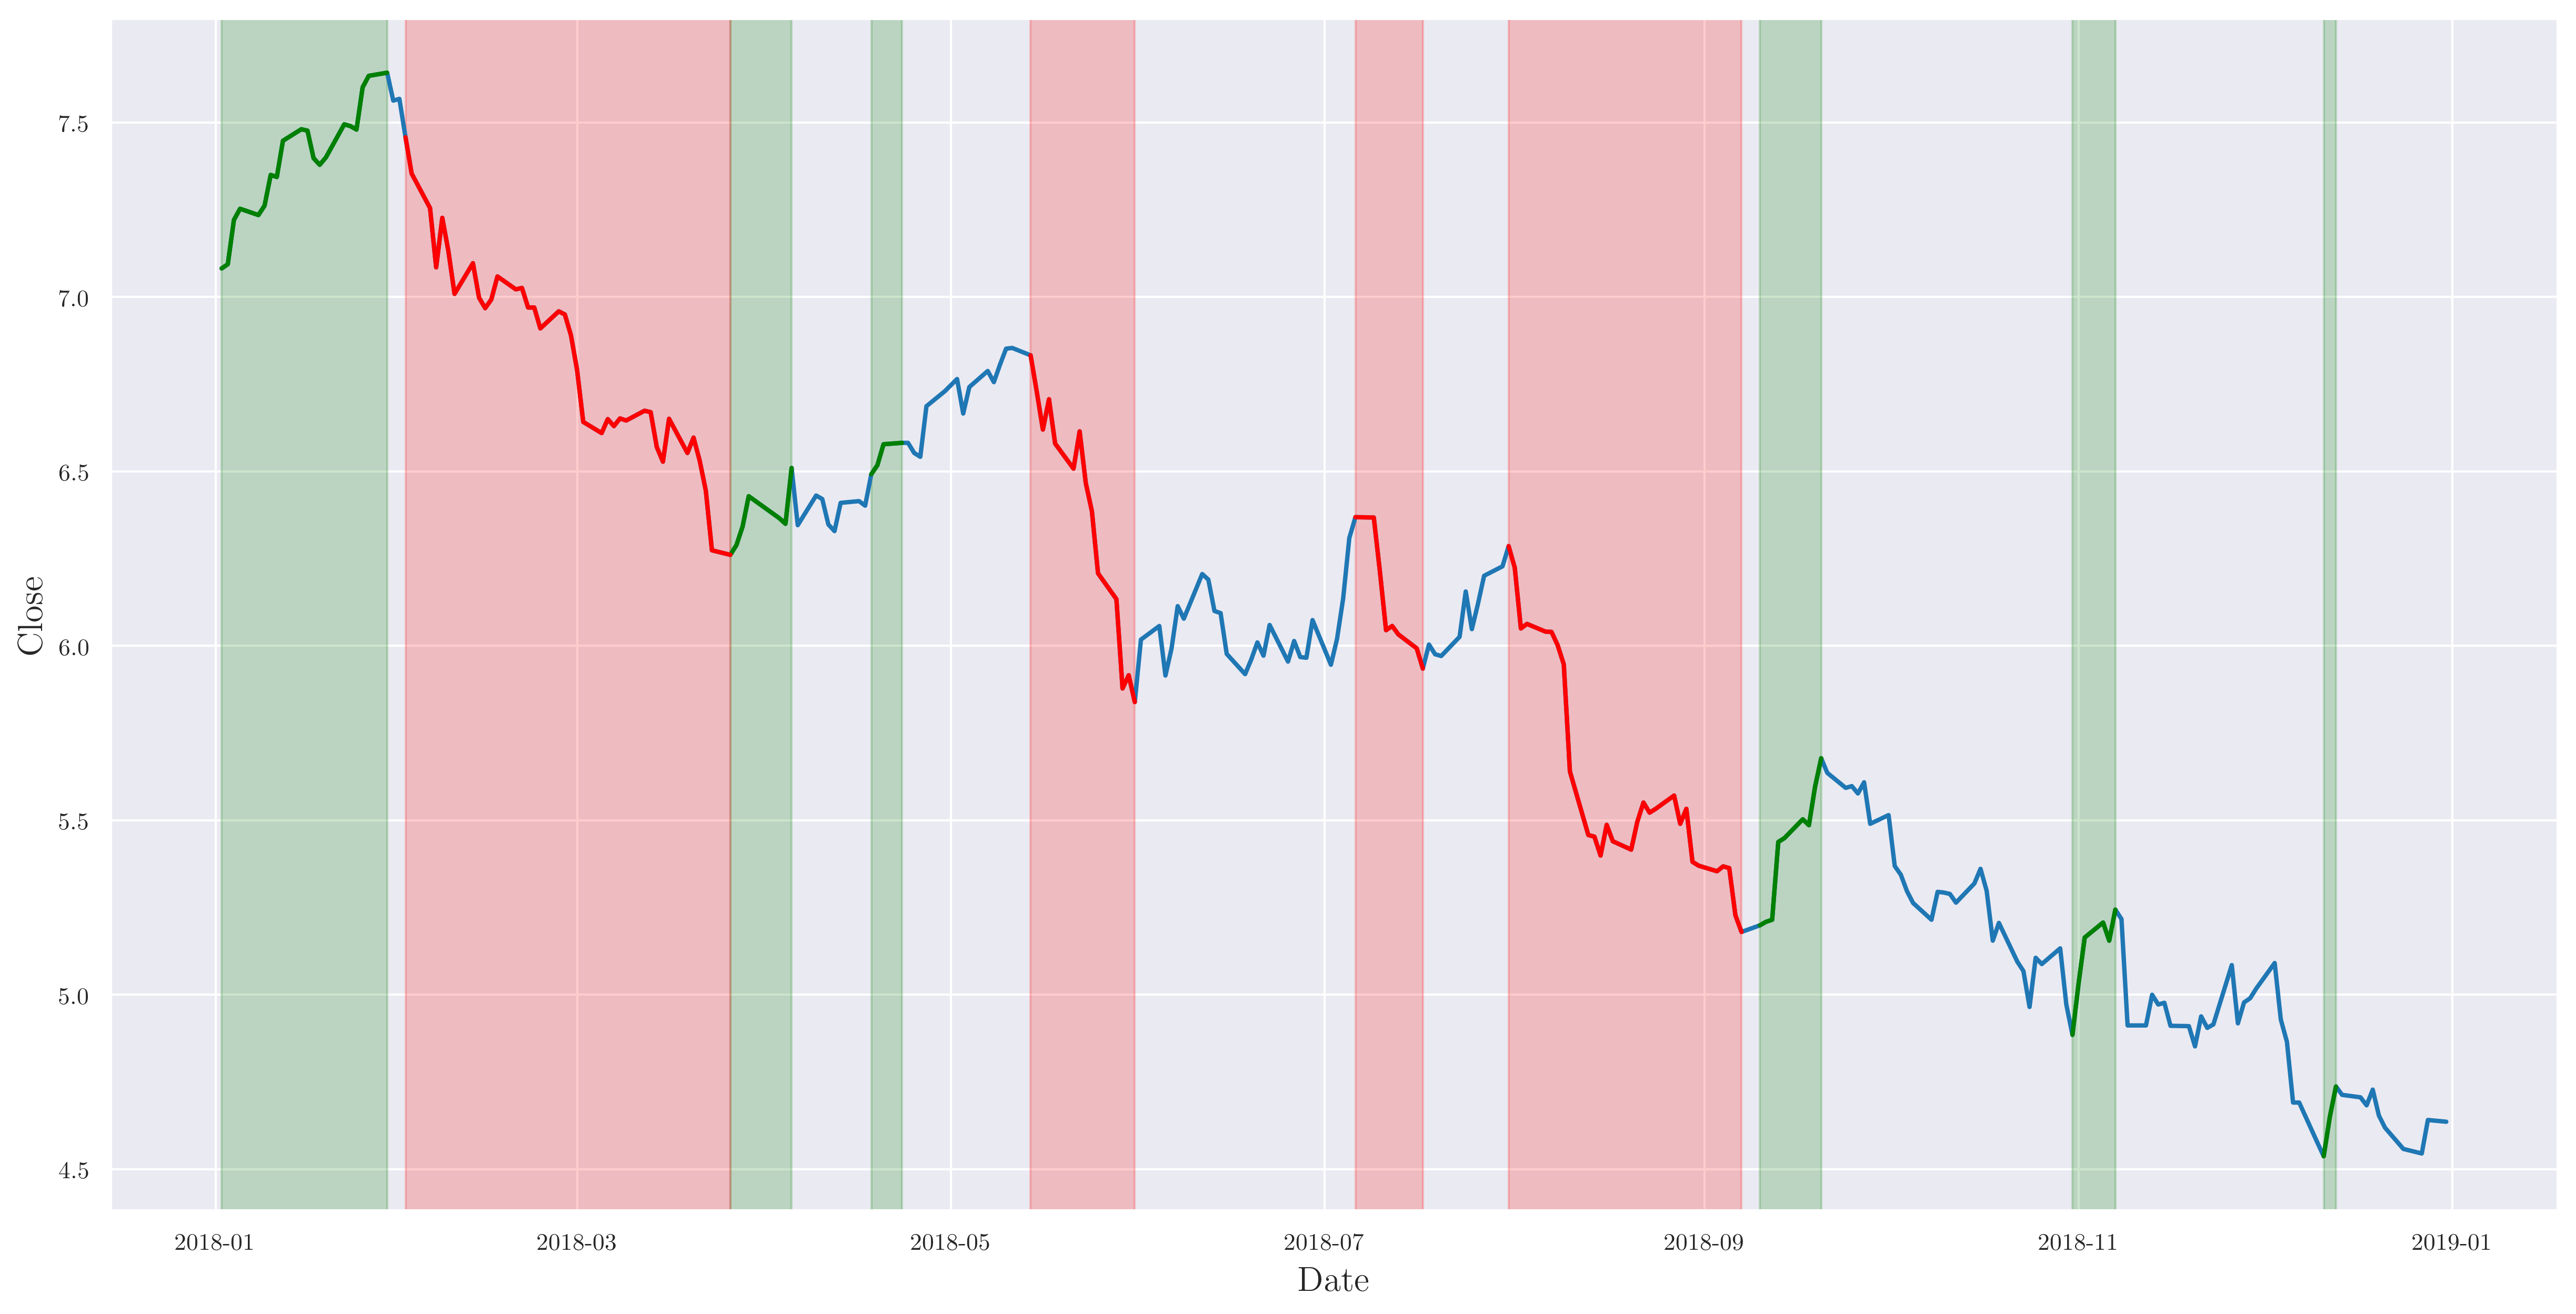

<Figure size 6000x3000 with 0 Axes>

In [15]:
with plt.style.context('paper'):
    plt.figure(figsize=(20, 10))

    ax = sns.lineplot(x=df['Date'], y=df['Close'])

    labels = df['Up Trend'].dropna().unique().tolist()

    for label in labels:
        sns.lineplot(x=df[df['Up Trend'] == label]['Date'],
                     y=df[df['Up Trend'] == label]['Close'],
                     color='green')

        ax.axvspan(df[df['Up Trend'] == label]['Date'].iloc[0],
                   df[df['Up Trend'] == label]['Date'].iloc[-1],
                   alpha=0.2,
                   color='green')

    labels = df['Down Trend'].dropna().unique().tolist()

    for label in labels:
        sns.lineplot(x=df[df['Down Trend'] == label]['Date'],
                     y=df[df['Down Trend'] == label]['Close'],
                     color='red')

        ax.axvspan(df[df['Down Trend'] == label]['Date'].iloc[0],
                   df[df['Down Trend'] == label]['Date'].iloc[-1],
                   alpha=0.2,
                   color='red')
        
    plt.figure(figsize=(20,10))
    plt.show()

---
## Información Adicional

Dado que **trendet** es un paquete de Python de código abierto, se ha subido a [Python Package Index](https://pypi.org/) para que se pueda instalar fácilmente a través de **pip**. Además, con el fin de probar tanto los casos de éxito como el control de errores, se ha integrado con herramientas de **CI** (Continuous Integration) como [Travis CI](https://travis-ci.org/alvarob96/trendet), [Azure Pipelines](https://dev.azure.com/alvarob96/alvarob96/_build?definitionId=2&_a=summary) y [GitHub Actions](https://github.com/alvarob96/trendet/actions) (a la cual tengo acceso solicitado en fase Beta). Resultante de la CI, se calcula el **code coverage**, es decir, el porcentaje de líneas de código útil a lo largo de todas las líneas ejecutables del paquete; cuyo resultado se sube a [codecov](https://codecov.io/gh/alvarob96/trendet) que es una herramienta que realiza dicho cálculo, resultante de [pytest](https://docs.pytest.org/en/latest/), en este caso.

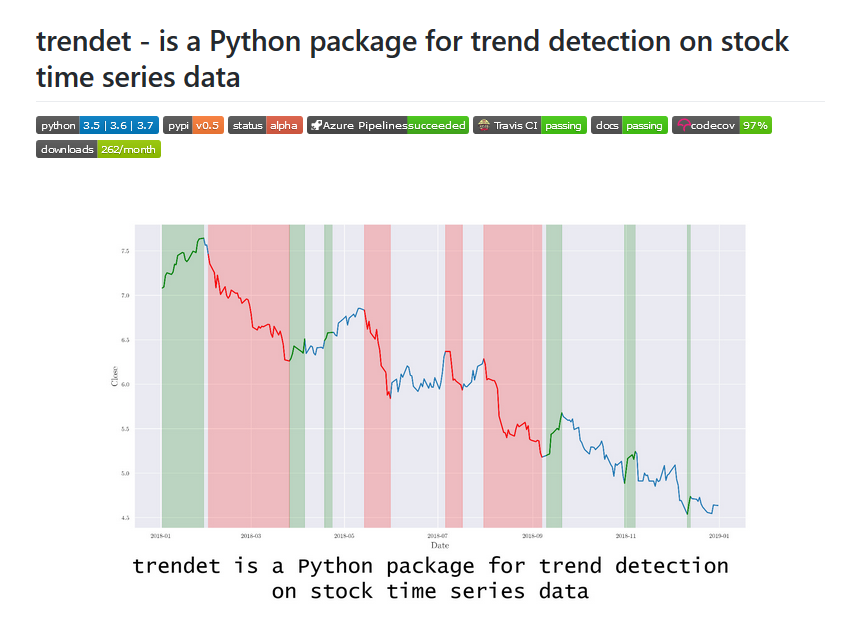

In [1]:
from IPython.display import Image
Image(filename='resources/trendet.png')

Por último, como se ha mencionado previamente, la creación de **trendet** tiene como propósito principal su integración con [investpy](https://github.com/alvarob96/investpy/), al igual que con cualquier `pandas.DataFrame` relacionado con valores históricos sobre series temporales de algún producto financiero.

---
## Documentación

La documentación de [trendet](https://github.com/alvarob96/trendet/) se ha generado con [sphinx](http://www.sphinx-doc.org/en/master/) que es una herramienta para generar documentación en Python basado en *reStructuredText*. Además, la documentación se ha subido al sistema de alojamiento de documentación [Read the Docs](https://readthedocs.org/).

De este modo, se podrá encontrar la documentación en: https://trendet.readthedocs.io/

---
## Licencia

MIT License

Copyright (c) 2019 Álvaro Bartolomé del Canto

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

---
## Autor

**Álvaro Bartolomé del Canto, 2019**